## To correctly classify the handwritten digits 0-9 from pixel data: SVM model with PCA

### Importing Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing all datasets
train = pd.read_csv("train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(len(train))

42000


### Let's understand the structure of our dataframe

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
print(train.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


### Data Preparation

In [ ]:
#Remove the label column

In [13]:
y_train=train["label"]

In [14]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [15]:
train = train.drop(["label"], axis=1)

In [16]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### PCA on the data

In [17]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [18]:
#Doing the PCA on the train data
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
pca.components_

array([[ 9.96535248e-17,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.47969138e-18,  4.09394740e-16, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.95984274e-19,  1.95156391e-17,  2.77555756e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -1.00000000e+00],
       [ 9.99999726e-01,  9.72764459e-05, -5.32654187e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

#### Looking at the screeplot to assess the number of principal components needed

In [20]:
pca.explained_variance_ratio_

array([9.74893769e-02, 7.16026628e-02, 6.14590336e-02, 5.37930200e-02,
       4.89426213e-02, 4.30321399e-02, 3.27705076e-02, 2.89210317e-02,
       2.76690235e-02, 2.34887103e-02, 2.09932543e-02, 2.05900116e-02,
       1.70255350e-02, 1.69278702e-02, 1.58112641e-02, 1.48323962e-02,
       1.31968789e-02, 1.28272708e-02, 1.18797614e-02, 1.15275473e-02,
       1.07219122e-02, 1.01519930e-02, 9.64902259e-03, 9.12846068e-03,
       8.87640859e-03, 8.38766308e-03, 8.11855855e-03, 7.77405747e-03,
       7.40635116e-03, 6.86661489e-03, 6.57982211e-03, 6.38798611e-03,
       5.99367016e-03, 5.88913410e-03, 5.64335178e-03, 5.40967048e-03,
       5.09221943e-03, 4.87504936e-03, 4.75569422e-03, 4.66544724e-03,
       4.52952464e-03, 4.44989164e-03, 4.18255277e-03, 3.97505755e-03,
       3.84541993e-03, 3.74919479e-03, 3.61013219e-03, 3.48522166e-03,
       3.36487802e-03, 3.20738135e-03, 3.15467117e-03, 3.09145543e-03,
       2.93709181e-03, 2.86541339e-03, 2.80759437e-03, 2.69618435e-03,
      

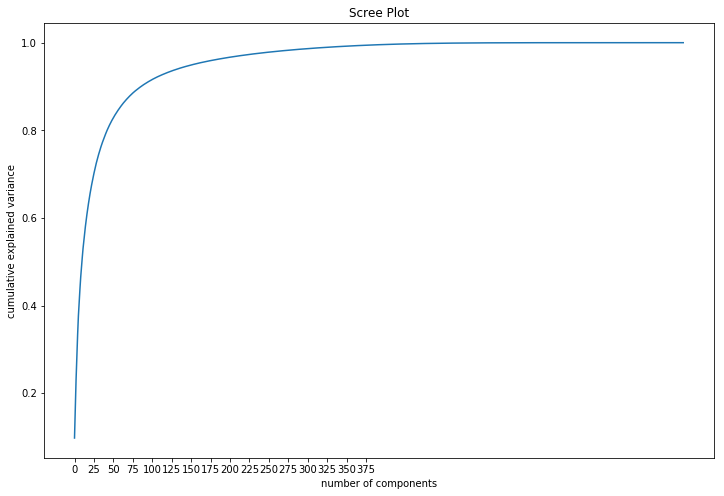

In [23]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('number of components')
plt.xticks(np.arange(0, 400, step=25))
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 150 components are enough to describe 95% of the variance in the dataset
- We'll choose 4 components for our modeling
- Incremental PCA is beneficial in case of large datasets. For this, PCA is a better choice.

In [24]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=150)

#### Basis transformation - getting the data onto our PCs

In [25]:
df_pca = pca_final.fit_transform(train)
df_pca.shape

(42000, 150)

In [26]:
#converting components(eigen vectors) into a dataframe
colnames = list(train.columns)
eigen_df = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1], 'PC3':pca_final.components_[2],'PC4':pca_final.components_[3],'Feature':colnames})
eigen_df.head(10)

,PC1,PC2,PC3,PC4,Feature
0,-7.232140e-18,1.040322e-17,-2.844132e-18,-2.086755e-18,pixel0
1,-4.440892e-16,1.665335e-16,-1.249001e-16,-2.289835e-16,pixel1
2,-5.551115e-16,-4.996004e-16,2.914335e-16,-1.873501e-16,pixel2
3,1.110223e-16,3.330669e-16,-2.359224e-16,9.714451e-17,pixel3
4,-0.000000e+00,1.110223e-16,-5.551115e-16,-1.873501e-16,pixel4
5,2.775558e-17,1.110223e-16,-2.359224e-16,1.804112e-16,pixel5
6,-1.387779e-17,-8.326673e-17,-1.665335e-16,-3.053113e-16,pixel6
7,1.734723e-18,1.526557e-16,8.881784e-16,-5.551115e-17,pixel7
8,-0.000000e+00,2.081668e-17,-1.110223e-16,-2.706169e-16,pixel8
9,-1.626303e-19,3.469447e-18,-0.000000e+00,5.551115e-17,pixel9


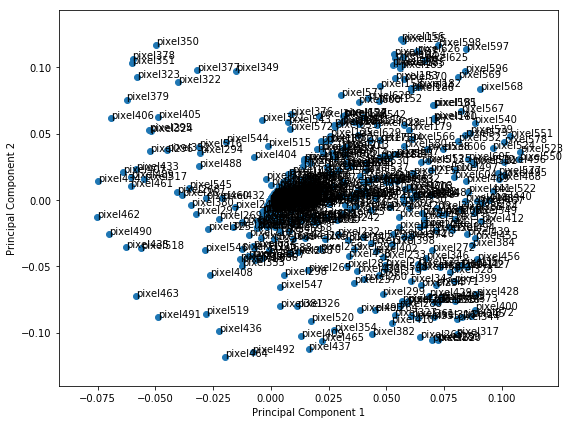

In [27]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(eigen_df.PC1, eigen_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(eigen_df.Feature):
    plt.annotate(txt, (eigen_df.PC1[i],eigen_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [28]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

In [31]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0017304583955808648 , min corr:  -0.0017662993708179831


Lets visualise the PC1 and PC2

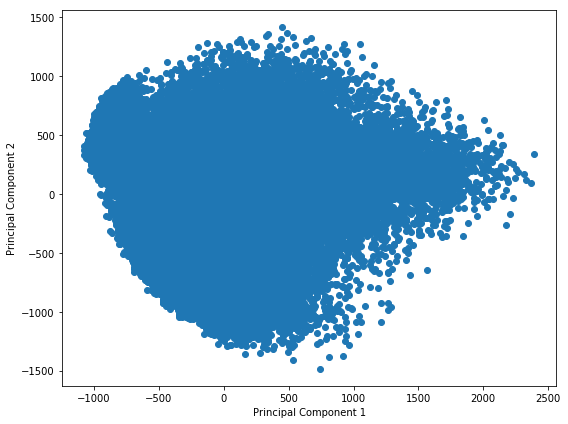

In [32]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

Hopkins Statistics:

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

    If the value is between {0.01, ...,0.3}, the data is regularly spaced.

    If the value is around 0.5, it is random.

    If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.



In [33]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
pcs_df = pd.DataFrame({'PC1':df_pca[:,0],'PC2':df_pca[:,1], 'PC3':df_pca[:,2],'PC4':df_pca[:,3]})
pcs_df.head(10)

,PC1,PC2,PC3,PC4
0,-661.595454,699.311536,-183.282451,-120.611384
1,1701.451454,360.550932,501.804777,-335.423940
2,-886.894610,293.765622,-67.155090,-78.263340
3,-165.755269,-300.184351,64.145997,-759.706196
4,1923.710300,449.153306,548.613806,-188.556618
5,487.751994,-192.752451,6.435644,40.855601
6,-672.323573,-464.803874,313.659892,136.131626
7,-114.382080,20.726875,504.583164,89.648238
8,350.229398,-141.013439,389.029819,619.260157
9,297.392337,807.412111,39.372566,51.967017


In [35]:
hopkins(pcs_df)

0.8802261452567209

Data shows high tendency of clustering. Lets check for Outliers.

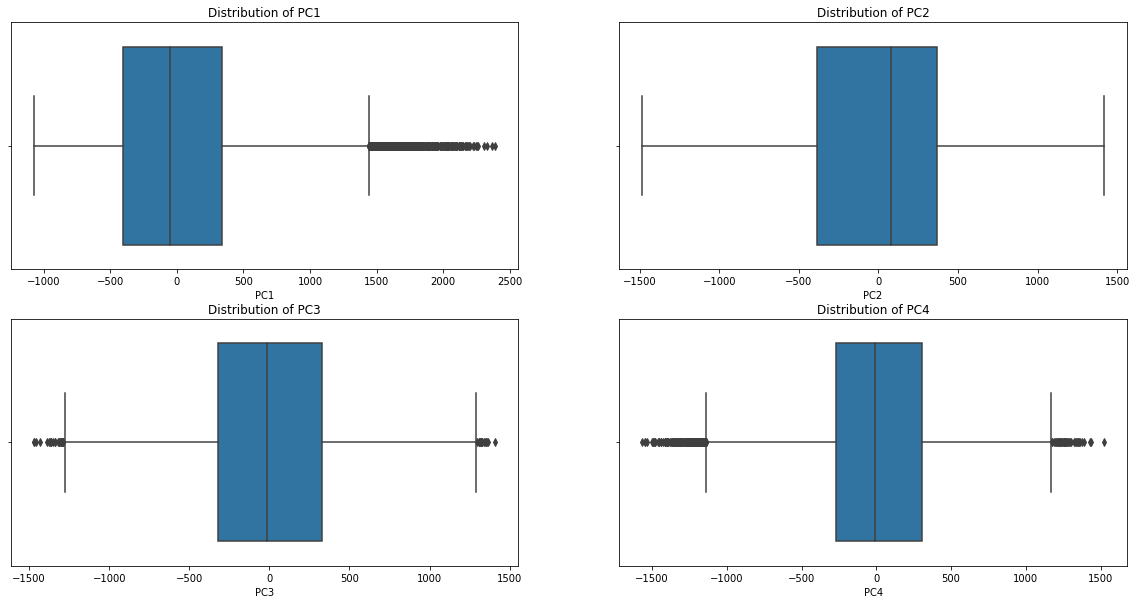

In [36]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(pcs_df['PC1'])
plt.title('Distribution of PC1')

plt.subplot(2,2,2)
sns.boxplot(pcs_df['PC2'])
plt.title('Distribution of PC2')

plt.subplot(2,2,3)
sns.boxplot(pcs_df['PC3'])
plt.title('Distribution of PC3')

plt.subplot(2,2,4)
sns.boxplot(pcs_df['PC4'])
plt.title('Distribution of PC4')
plt.show()

Find the Inter Quantile range for outlier removal.

In [37]:
Q1 = pcs_df.quantile(0.25)
Q3 = pcs_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PC1    738.321090
PC2    749.133260
PC3    645.182153
PC4    578.299182
dtype: float64


In [38]:
#Outliers df
out = pcs_df[((pcs_df < (Q1 - 1.5*IQR)) | (pcs_df > (Q3 + 1.5*IQR))).any(axis=1)]
len(out)

1102

There are about 1102 rows which have the outlier values

In [39]:
len(out)*100/len(pcs_df)

2.623809523809524

In [40]:
len(pcs_df)

42000

In [41]:
pcs_out = pcs_df[((pcs_df >= (Q1 - 1.5*IQR)) & (pcs_df <= (Q3 + 1.5*IQR))).all(axis=1)]

In [42]:
len(pcs_out)

40898

In [43]:
hopkins(pcs_out)

0.8282973805174553

The hopkins statistics have dropped after removing the outliers. Moreover we are loosing 25% of the valuable data. And may miss out on countries requiring aids. So lets not remove the outliers.

Now we can do the Clustering using K-means

## K-Means with some K

In [805]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Silhouette Analysis
Silhouette score will help us to choose an appropriate value of k

In [806]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df)
    sse_.append([k, silhouette_score(pcs_df, kmeans.labels_)])

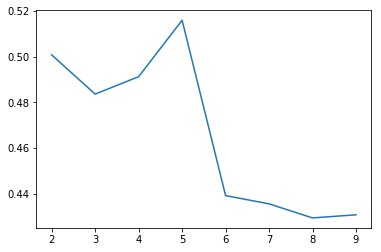

In [807]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

According to Silhouette score plot we can see that both k=4 and k=5 are good.

## Sum of Squared Distances

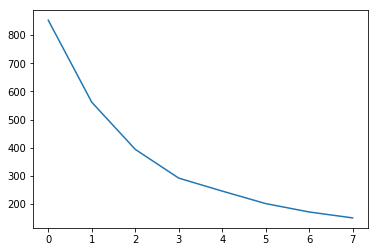

In [808]:
# sum of squared distances
ssd = []
for num_clusters in list(range(2,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

The smaller the value of sum of square distances, the better it is. So we can choose either 4 or 5. So lets choose k=4.

In [809]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50, random_state=0)
model_clus4.fit(pcs_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [810]:
model_clus4.labels_

array([3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3,
       0, 1, 0, 3, 3, 0, 3, 1, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 1, 0,
       1, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 3, 3, 0, 1, 3, 0, 0, 0, 3, 3, 0,
       3, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 3, 3, 1, 0, 3, 0, 0, 3,
       3, 0, 0, 2, 0, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       1, 1, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 1, 0, 0, 3, 3, 0, 1, 0, 0, 3, 0, 1, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3])

In [811]:
pcs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
PC1    167 non-null float64
PC2    167 non-null float64
PC3    167 non-null float64
PC4    167 non-null float64
dtypes: float64(4)
memory usage: 5.3 KB


In [812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
memory usage: 13.1+ KB


concatenate the original dataframe with the PCA dataframe.

In [813]:
df1 = pd.concat([df,pcs_df], axis=1)

In [814]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
PC1           167 non-null float64
PC2           167 non-null float64
PC3           167 non-null float64
PC4           167 non-null float64
dtypes: float64(13), object(1)
memory usage: 18.3+ KB


In [815]:
# analysis of clusters formed
#Add the Cluster number
final_df = pd.concat([df1, pd.Series(model_clus4.labels_).rename('ClusterID')], axis=1)

In [816]:
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,-0.463617,-1.614237,1.897176,-0.677143,-2.644408,1.575935,-0.249473,-0.261199,3
1,Albania,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.348601,0.645924,-0.857394,-0.484167,-0.163437,-1.435221,-0.092994,0.416566,0
2,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.119046,0.668413,-0.038289,-0.463980,-0.330999,-0.789770,0.373888,0.265957,0
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,0.182628,-1.175698,2.121770,-0.514720,-2.417752,2.141078,0.285958,-0.367783,3
4,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.355568,0.702147,-0.540321,-0.041692,0.469776,-1.021416,-0.205063,0.260684,0


In [817]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
PC1           167 non-null float64
PC2           167 non-null float64
PC3           167 non-null float64
PC4           167 non-null float64
ClusterID     167 non-null int32
dtypes: float64(13), int32(1), object(1)
memory usage: 19.0+ KB


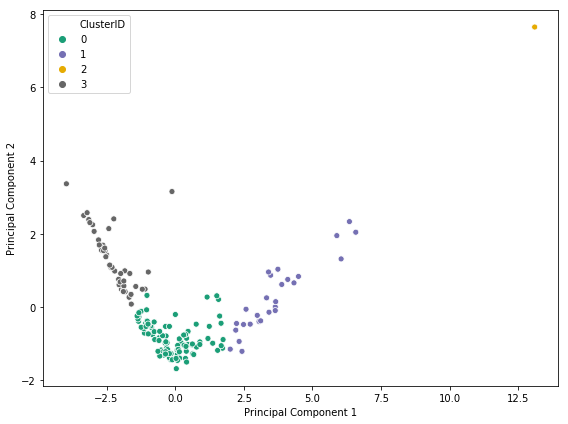

In [818]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
sns.scatterplot(final_df['PC1'], final_df['PC2'], hue=final_df['ClusterID'], palette="Dark2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

#### From the scatter plot cluster 3 seems to be our choice having low PC1 and high PC2.  Lets analyse it further on the basis of mean. Cluster 2 seems to be an outlier with only one country.

In [819]:
final_df[(final_df['ClusterID']==2)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
91,Luxembourg,-0.879519,9.810309,3.94234,9.687546,3.867364,2.816798,1.208153,-0.870606,5.021405,13.092921,7.644253,-2.848881,4.08324,2


In [820]:
km_clust_PC1 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC1.mean())
km_clust_PC2 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC2.mean())
km_clust_PC3 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC3.mean())
km_clust_PC4 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC4.mean())
km_clust_child_mort = pd.DataFrame(final_df.groupby(["ClusterID"]).child_mort.mean())
km_clust_health = pd.DataFrame(final_df.groupby(["ClusterID"]).health.mean())
km_clust_total_fer =  pd.DataFrame(final_df.groupby(["ClusterID"]).total_fer.mean())
km_clust_income = pd.DataFrame(final_df.groupby(["ClusterID"]).income.mean())
km_clust_life_expec = pd.DataFrame(final_df.groupby(["ClusterID"]).life_expec.mean())

In [821]:
df1 = pd.concat([pd.Series([0,1,2,3]), km_clust_PC1, km_clust_PC2,km_clust_PC3,km_clust_PC4], axis=1)
df1.columns = ["ClusterID", "PC1_mean", "PC2_mean","PC3_mean","PC4_mean"]
df1

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,-0.063013,-0.834976,0.066467,0.264901
1,1,3.634639,0.265412,0.007653,-0.756610
2,2,13.092921,7.644253,-2.848881,4.083240
3,3,-2.243213,1.319307,-0.073887,-0.170759


In [822]:
df2 = pd.concat([pd.Series([0,1,2,3]),km_clust_child_mort,km_clust_health,km_clust_total_fer,km_clust_income,km_clust_life_expec], axis=1)
df2.columns = ["ClusterID","child_mort_mean","health_mean","total_fer_mean","income_mean","life_expec_mean"]
df2

,ClusterID,child_mort_mean,health_mean,total_fer_mean,income_mean,life_expec_mean
0,0,-0.439712,-0.283827,-0.454232,-0.165496,0.318975
1,1,-0.821753,1.736712,-0.781062,1.633776,1.116530
2,2,-0.879519,3.942340,-0.870606,3.867364,1.208153
3,3,1.351496,-0.525989,1.356354,-0.696886,-1.291494


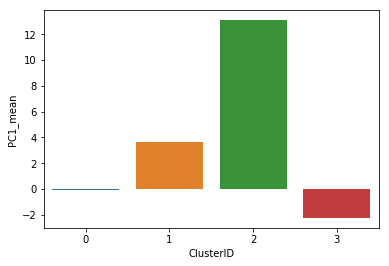

In [823]:
sns.barplot(x=df1.ClusterID, y=df1.PC1_mean)

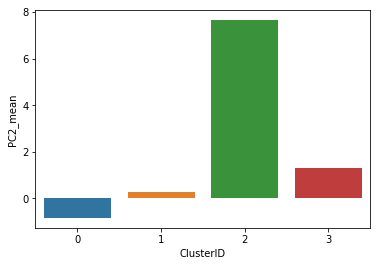

In [824]:
sns.barplot(x=df1.ClusterID, y=df1.PC2_mean)

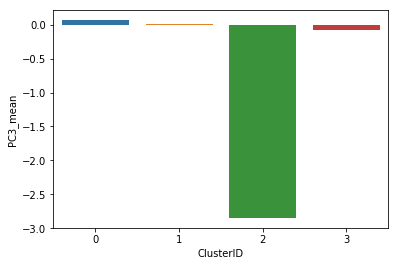

In [825]:
sns.barplot(x=df1.ClusterID, y=df1.PC3_mean)

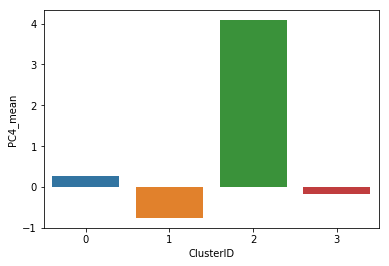

In [826]:
sns.barplot(x=df1.ClusterID, y=df1.PC4_mean)

In [827]:
#sns.barplot(x=df1.ClusterID, y=df1.PC5_mean)

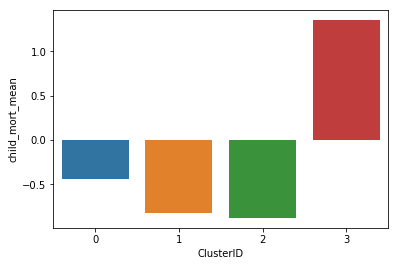

In [828]:
sns.barplot(x=df2.ClusterID, y=df2.child_mort_mean)

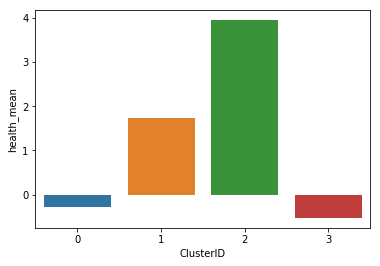

In [829]:
sns.barplot(x=df2.ClusterID, y=df2.health_mean)

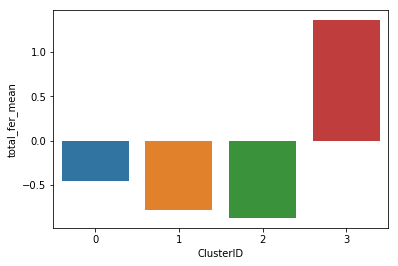

In [830]:
sns.barplot(x=df2.ClusterID, y=df2.total_fer_mean)

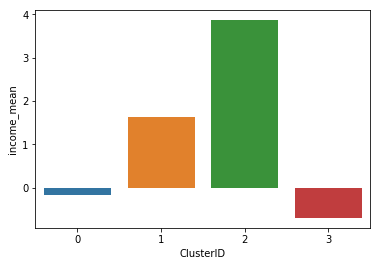

In [831]:
sns.barplot(x=df2.ClusterID, y=df2.income_mean)

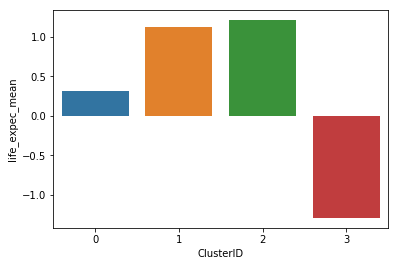

In [832]:
sns.barplot(x=df2.ClusterID, y=df2.life_expec_mean)

On Analysing the barplots we can clearly see that Cluster 3 has high child_mort and total_fert but low health, income and life_expec. So Cluster 3 is our preferred cluster for aids.

In [833]:
df_reqd4=final_df[(final_df.ClusterID==3)]

In [834]:
len(df_reqd4)

47

In [835]:
df_reqd4

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,-0.463617,-1.614237,1.897176,-0.677143,-2.644408,1.575935,-0.249473,-0.261199,3
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,0.182628,-1.175698,2.121770,-0.514720,-2.417752,2.141078,0.285958,-0.367783,3
17,Benin,1.803418,-0.402819,-0.569363,-0.428690,-0.794929,-0.503428,-0.984541,1.593315,-0.665958,-2.501027,1.427697,-0.292876,-0.288600,3
21,Botswana,0.352847,-0.258821,-0.294038,-0.226419,-0.199433,-0.013647,-1.513036,-0.044895,-0.360863,-1.096249,0.490077,0.102767,0.118712,3
25,Burkina Faso,1.927399,-0.406713,-0.565101,-0.436288,-0.815159,-0.475033,-1.423079,1.930205,-0.675943,-2.791493,1.833528,-0.275499,-0.365727,3
26,Burundi,1.371966,-0.411709,-0.571740,-0.441702,-0.849706,-0.484435,-1.445568,2.187827,-0.694711,-2.733072,1.673460,-0.264246,-0.327126,3
28,Cameroon,1.729030,-0.396675,-0.549309,-0.423814,-0.751356,-0.487403,-1.490547,1.428173,-0.635842,-2.557005,1.536619,-0.288374,-0.256071,3
31,Central African Republic,2.745670,-0.409928,-0.576761,-0.439824,-0.843274,-0.501453,-2.592516,1.494230,-0.682981,-3.331588,2.500083,-0.359718,-0.369074,3
32,Chad,2.770466,-0.394490,-0.564058,-0.421333,-0.789223,-0.459141,-1.580503,2.405814,-0.658375,-3.208073,2.576287,-0.281492,-0.577330,3
36,Comoros,1.238068,-0.405796,-0.567362,-0.420832,-0.816196,-0.483256,-0.523513,1.190368,-0.665358,-2.060010,0.759459,-0.266253,-0.130132,3


In [836]:
country4=set(df_reqd4['country'])

In [837]:
country4

{'Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia'}

These are the group pf countries which are in direst need of aid.

Lets repeat the K-means with k=5

In [838]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50, random_state=0)
model_clus5.fit(pcs_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [839]:
model_clus5.labels_

array([0, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 0,
       3, 4, 3, 0, 0, 3, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 1, 3,
       1, 3, 3, 3, 3, 4, 0, 3, 3, 1, 1, 0, 0, 3, 1, 0, 1, 3, 3, 0, 0, 3,
       0, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 0, 0, 4, 3, 0, 3, 3, 0,
       0, 3, 3, 2, 3, 0, 0, 3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       1, 1, 0, 0, 4, 4, 0, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 3, 4, 0, 3, 3,
       0, 1, 3, 1, 0, 0, 3, 1, 3, 3, 0, 3, 1, 1, 3, 0, 3, 0, 0, 3, 3, 3,
       3, 0, 3, 4, 1, 1, 3, 3, 3, 4, 3, 0, 0])

In [840]:
# analysis of clusters formed
f_df = pd.concat([df, pcs_df], axis=1)
final_df = pd.concat([f_df, pd.Series(model_clus5.labels_).rename('ClusterID')], axis=1)

In [841]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
PC1           167 non-null float64
PC2           167 non-null float64
PC3           167 non-null float64
PC4           167 non-null float64
ClusterID     167 non-null int32
dtypes: float64(13), int32(1), object(1)
memory usage: 19.0+ KB


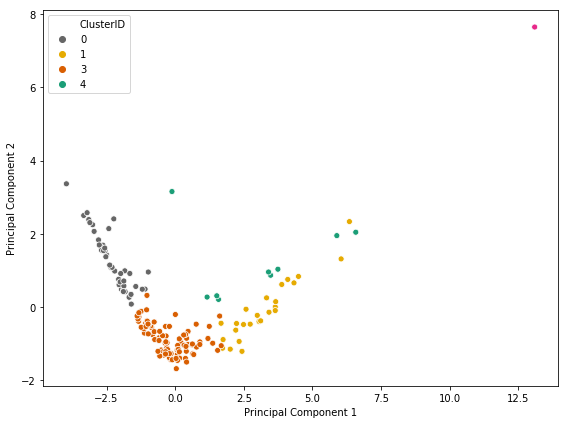

In [842]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
sns.scatterplot(final_df['PC1'], final_df['PC2'], hue=final_df['ClusterID'], palette="Dark2_r")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [843]:
len(final_df[(final_df['ClusterID']==0)])

46

Cluster 0 seems to be our choice with low PC1 and high PC2.

In [844]:
len(final_df[(final_df['ClusterID']==1)])

25

In [845]:
len(final_df[(final_df['ClusterID']==2)])

1

In [846]:
final_df[(final_df['ClusterID']==2)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
91,Luxembourg,-0.879519,9.810309,3.94234,9.687546,3.867364,2.816798,1.208153,-0.870606,5.021405,13.092921,7.644253,-2.848881,4.08324,2


This seems to be an outlier. So it has been clustered seperately

In [847]:
len(final_df[(final_df['ClusterID']==3)])

86

In [848]:
len(final_df[(final_df['ClusterID']==4)])

9

In [849]:
km_clust_PC1 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC1.mean())
km_clust_PC2 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC2.mean())
km_clust_PC3 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC3.mean())
km_clust_PC4 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC4.mean())
km_clust_child_mort = pd.DataFrame(final_df.groupby(["ClusterID"]).child_mort.mean())
km_clust_health = pd.DataFrame(final_df.groupby(["ClusterID"]).health.mean())
km_clust_total_fer =  pd.DataFrame(final_df.groupby(["ClusterID"]).total_fer.mean())
km_clust_income = pd.DataFrame(final_df.groupby(["ClusterID"]).income.mean())
km_clust_life_expec = pd.DataFrame(final_df.groupby(["ClusterID"]).life_expec.mean())

In [850]:
df1 = pd.concat([pd.Series([0,1,2,3,4]), km_clust_PC1, km_clust_PC2,km_clust_PC3,km_clust_PC4], axis=1)
df1.columns = ["ClusterID", "PC1_mean", "PC2_mean","PC3_mean","PC4_mean"]
df1

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,-2.289432,1.279428,-0.136272,-0.174344
1,1,3.207689,-0.085527,-0.714612,-0.839307
2,2,13.092921,7.644253,-2.848881,4.083240
3,3,-0.176651,-0.873902,-0.017870,0.285379
4,4,3.024522,1.199529,3.168837,0.041853


In [851]:
df2 = pd.concat([pd.Series([0,1,2,3,4]),km_clust_child_mort,km_clust_health,km_clust_total_fer,km_clust_income,km_clust_life_expec], axis=1)
df2.columns = ["ClusterID","child_mort_mean","health_mean","total_fer_mean","income_mean","life_expec_mean"]
df2

,ClusterID,child_mort_mean,health_mean,total_fer_mean,income_mean,life_expec_mean
0,0,1.341672,-0.533916,1.353356,-0.730705,-1.295967
1,1,-0.841730,1.798575,-0.789752,1.184730,1.161375
2,2,-0.879519,3.942340,-0.870606,3.867364,1.208153
3,3,-0.420388,-0.322945,-0.460746,-0.232131,0.282959
4,4,-0.404536,0.380742,-0.223982,2.232230,0.559715


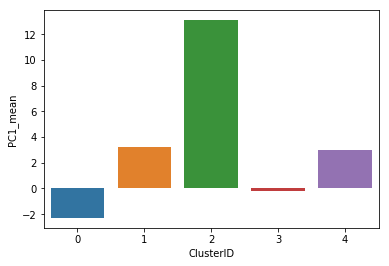

In [852]:
sns.barplot(x=df1.ClusterID, y=df1.PC1_mean)

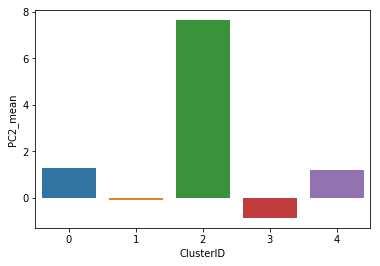

In [853]:
sns.barplot(x=df1.ClusterID, y=df1.PC2_mean)

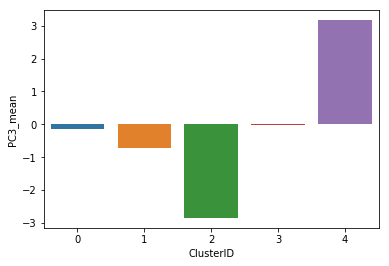

In [854]:
sns.barplot(x=df1.ClusterID, y=df1.PC3_mean)

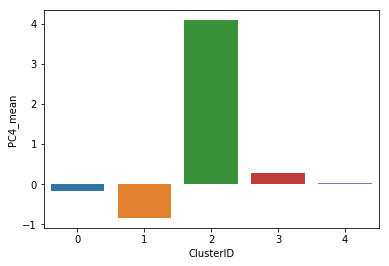

In [855]:
sns.barplot(x=df1.ClusterID, y=df1.PC4_mean)

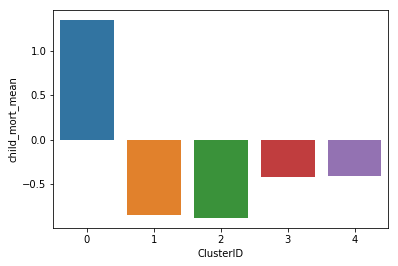

In [856]:
sns.barplot(x=df2.ClusterID, y=df2.child_mort_mean)

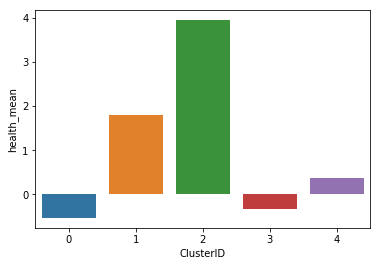

In [857]:
sns.barplot(x=df2.ClusterID, y=df2.health_mean)

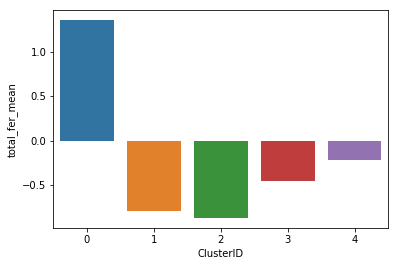

In [858]:
sns.barplot(x=df2.ClusterID, y=df2.total_fer_mean)

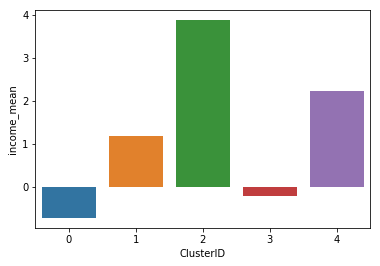

In [859]:
sns.barplot(x=df2.ClusterID, y=df2.income_mean)

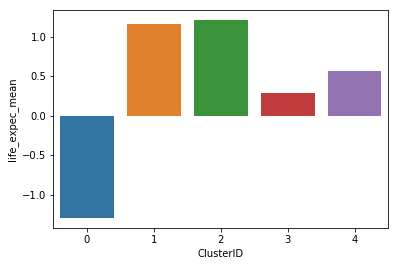

In [860]:
sns.barplot(x=df2.ClusterID, y=df2.life_expec_mean)

Cluster 0 has high child_mort and  total_fert and low income, health and life_expec. So cluster 0 is our preferred choice.

In [861]:
df5=final_df[(final_df.ClusterID == 0)]

In [862]:
len(df5)

46

In [863]:
df5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,-0.463617,-1.614237,1.897176,-0.677143,-2.644408,1.575935,-0.249473,-0.261199,0
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,0.182628,-1.175698,2.121770,-0.514720,-2.417752,2.141078,0.285958,-0.367783,0
17,Benin,1.803418,-0.402819,-0.569363,-0.428690,-0.794929,-0.503428,-0.984541,1.593315,-0.665958,-2.501027,1.427697,-0.292876,-0.288600,0
21,Botswana,0.352847,-0.258821,-0.294038,-0.226419,-0.199433,-0.013647,-1.513036,-0.044895,-0.360863,-1.096249,0.490077,0.102767,0.118712,0
25,Burkina Faso,1.927399,-0.406713,-0.565101,-0.436288,-0.815159,-0.475033,-1.423079,1.930205,-0.675943,-2.791493,1.833528,-0.275499,-0.365727,0


In [864]:
df5.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
149,Timor-Leste,0.603287,-0.408449,-0.404358,-0.379826,-0.793372,0.325508,0.061206,2.168010,-0.510901,-1.651689,0.916764,0.432019,-0.317656,0
150,Togo,1.290139,-0.401941,-0.565891,-0.428850,-0.826571,-0.504259,-1.333123,1.269636,-0.680689,-2.384972,1.146577,-0.300756,-0.136465,0
155,Uganda,1.059536,-0.407195,-0.556855,-0.436290,-0.809453,-0.454108,-1.546770,2.115164,-0.674852,-2.612561,1.541214,-0.228951,-0.277747,0
165,Yemen,0.447072,-0.390991,-0.548945,-0.417225,-0.656948,-0.238765,-0.343599,1.137523,-0.635842,-1.608573,0.346818,0.000531,-0.010569,0
166,Zambia,1.111607,-0.382801,-0.538878,-0.417191,-0.719195,-0.330436,-2.086510,1.619738,-0.627658,-2.566169,1.610271,-0.141650,-0.181316,0


All these countries require help. So the countries obtained are fairly good.

In [865]:
country5=set(df5['country'])
country5

{'Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia'}

Analyse the countries obtained with k=4 and k=5.

In [866]:
common=country4.intersection(country5)

In [867]:
len(common)

46

country not present in cluster with k=5 but present in k=4

In [868]:
country4-common

{'Equatorial Guinea'}

In [869]:
final_df[(final_df.country == "Equatorial Guinea")]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
49,Equatorial Guinea,1.803418,0.403429,-0.161348,0.236802,0.858764,3.216612,-1.085742,1.49423,0.225648,-0.117133,3.153742,2.79585,-0.005877,4


The results of clustering with k=5 and k=4 are more or less the same. There is only one country (Equitorial Guinea) which is extra in k=4. On analysis it is found that thie scountry does not require the aid as its income and gdpp is much better than the countries in the same cluster. So we take country5 as the set of countries.

## Hierarchichal Clustering

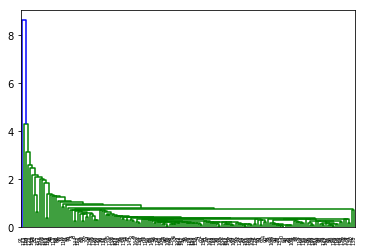

In [870]:
mergings = linkage(pcs_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

The dendrogram with single linkage is not very clear. So let us try complete linkage

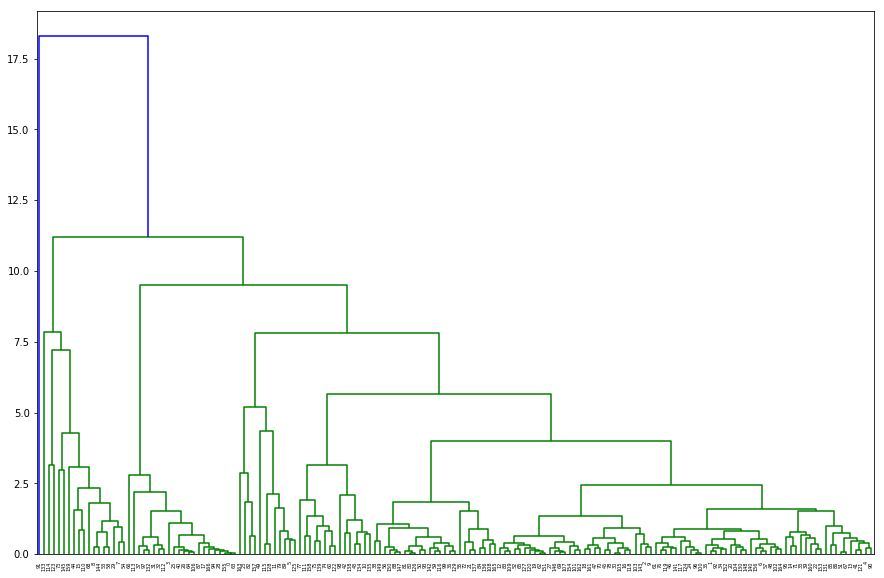

In [871]:
plt.figure(figsize=(15,10))
mergings = linkage(pcs_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

The dendrogram can be cut at 3 or 4. 3 will be too less So taking no of clusters as 4

In [872]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [873]:
#Add the cluster Id to the df
df_hc = pd.concat([f_df, clusterCut.rename('ClusterID')], axis=1)

In [874]:
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,-0.463617,-1.614237,1.897176,-0.677143,-2.644408,1.575935,-0.249473,-0.261199,0
1,Albania,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.348601,0.645924,-0.857394,-0.484167,-0.163437,-1.435221,-0.092994,0.416566,1
2,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.119046,0.668413,-0.038289,-0.463980,-0.330999,-0.789770,0.373888,0.265957,1
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,0.182628,-1.175698,2.121770,-0.514720,-2.417752,2.141078,0.285958,-0.367783,0
4,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.355568,0.702147,-0.540321,-0.041692,0.469776,-1.021416,-0.205063,0.260684,1


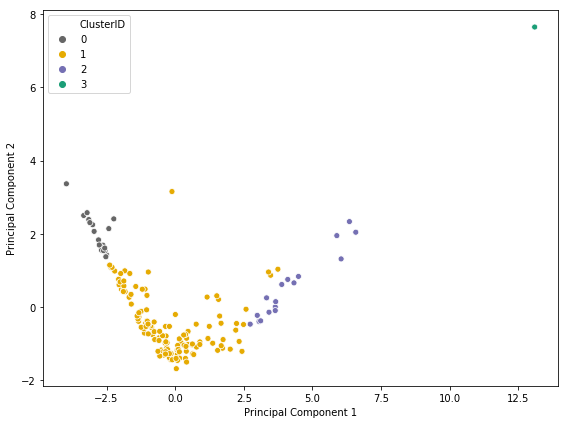

In [875]:
#Analyse the scatter plot
%matplotlib inline
fig = plt.figure(figsize = (8,6))
sns.scatterplot(df_hc['PC1'], df_hc['PC2'], hue=df_hc['ClusterID'], palette="Dark2_r")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

Cluster 0 seems to be our choice with low PC1 and high PC2

In [876]:
len(final_df[(df_hc['ClusterID']==0)])

22

In [877]:
len(final_df[(df_hc['ClusterID']==1)])

127

In [878]:
len(final_df[(df_hc['ClusterID']==2)])

17

In [879]:
len(final_df[(df_hc['ClusterID']==3)])

1

In [880]:
final_df[(df_hc['ClusterID']==3)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
91,Luxembourg,-0.879519,9.810309,3.94234,9.687546,3.867364,2.816798,1.208153,-0.870606,5.021405,13.092921,7.644253,-2.848881,4.08324,2


Luxembourg is an outlier and has been clustered seperately.

Take the mean of the PCs and some original features, cluster wise

In [881]:
hc_clust_PC1 = pd.DataFrame(df_hc.groupby(["ClusterID"]).PC1.mean())
hc_clust_PC2 = pd.DataFrame(df_hc.groupby(["ClusterID"]).PC2.mean())
hc_clust_PC3 = pd.DataFrame(df_hc.groupby(["ClusterID"]).PC3.mean())
hc_clust_PC4 = pd.DataFrame(df_hc.groupby(["ClusterID"]).PC4.mean())
hc_clust_child_mort = pd.DataFrame(df_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clust_health = pd.DataFrame(df_hc.groupby(["ClusterID"]).health.mean())
hc_clust_total_fer =  pd.DataFrame(df_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clust_income = pd.DataFrame(df_hc.groupby(["ClusterID"]).income.mean())
hc_clust_life_expec = pd.DataFrame(df_hc.groupby(["ClusterID"]).life_expec.mean())

In [882]:
df3 = pd.concat([pd.Series([0,1,2,3]), hc_clust_PC1, hc_clust_PC2,hc_clust_PC3,hc_clust_PC4], axis=1)
df3.columns = ["ClusterID", "PC1_mean", "PC2_mean","PC3_mean","PC4_mean"]
df3

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,-2.805182,1.942641,-0.175192,-0.319168
1,1,-0.178107,-0.469262,0.110149,0.163919
2,2,4.190628,0.541994,-0.428581,-1.051720
3,3,13.092921,7.644253,-2.848881,4.083240


In [883]:
df4 = pd.concat([pd.Series([0,1,2,3]),hc_clust_child_mort,hc_clust_health,hc_clust_total_fer,hc_clust_income,hc_clust_life_expec], axis=1)
df4.columns = ["ClusterID","child_mort_mean","health_mean","total_fer_mean","income_mean","life_expec_mean"]
df4

,ClusterID,child_mort_mean,health_mean,total_fer_mean,income_mean,life_expec_mean
0,0,1.981612,-0.558224,1.737139,-0.788933,-1.743039
1,1,-0.224121,-0.241889,-0.192873,-0.127923,0.138324
2,2,-0.838387,2.297561,-0.755977,1.749139,1.151269
3,3,-0.879519,3.942340,-0.870606,3.867364,1.208153


#### Plot the various mean values to choose the Cluster

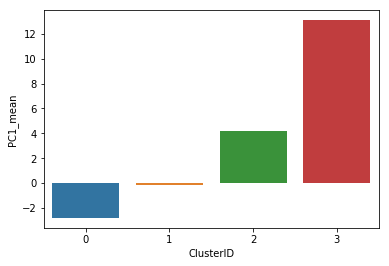

In [884]:
sns.barplot(x=df3.ClusterID, y=df3.PC1_mean)

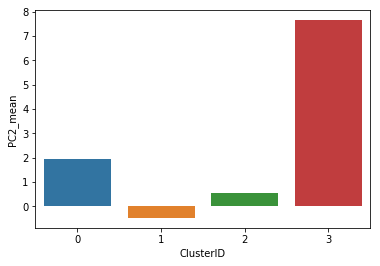

In [885]:
sns.barplot(x=df3.ClusterID, y=df3.PC2_mean)

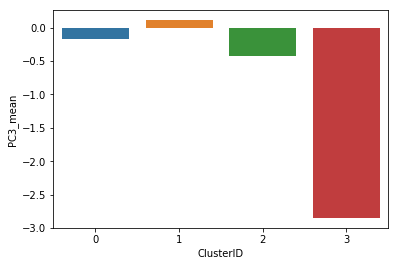

In [886]:
sns.barplot(x=df3.ClusterID, y=df3.PC3_mean)

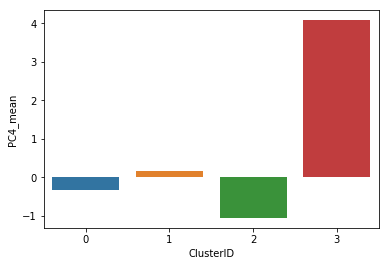

In [887]:
sns.barplot(x=df3.ClusterID, y=df3.PC4_mean)

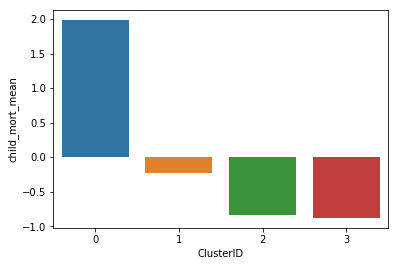

In [888]:
sns.barplot(x=df4.ClusterID, y=df4.child_mort_mean)

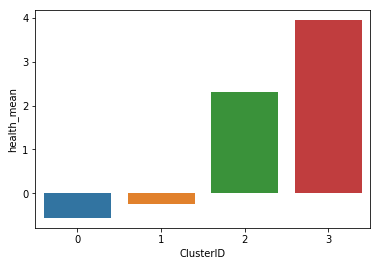

In [889]:
sns.barplot(x=df4.ClusterID, y=df4.health_mean)

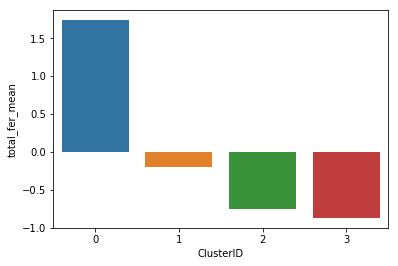

In [890]:
sns.barplot(x=df4.ClusterID, y=df4.total_fer_mean)

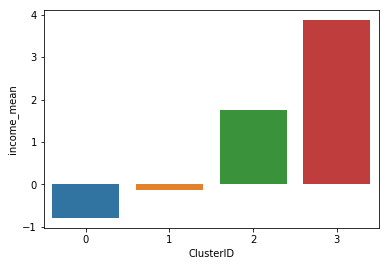

In [891]:
sns.barplot(x=df4.ClusterID, y=df4.income_mean)

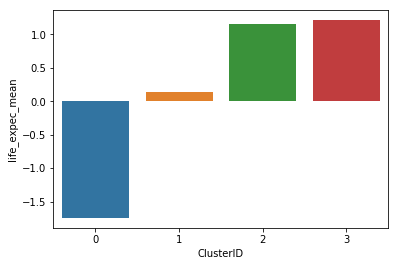

In [892]:
sns.barplot(x=df4.ClusterID, y=df4.life_expec_mean)

Cluster 0 has high child_mort and total_fert and low income, health and life_expect. So cluster 0 is most suitable.


In [893]:
df_help = df_hc[(df_hc.ClusterID==0)]

In [894]:
len(df_help)

22

In [895]:
countryhc = set(df_help['country'])

In [896]:
com=countryhc.intersection(country5)

In [897]:
len(com)

22

countries missing in the cluster obtained through HC are -

In [898]:
country5-com

{'Botswana',
 'Comoros',
 'Congo, Rep.',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Kenya',
 'Kiribati',
 'Lao',
 'Liberia',
 'Madagascar',
 'Mauritania',
 'Namibia',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Yemen'}

In [899]:
final_df[final_df.country == 'Togo']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
150,Togo,1.290139,-0.401941,-0.565891,-0.42885,-0.826571,-0.504259,-1.333123,1.269636,-0.680689,-2.384972,1.146577,-0.300756,-0.136465,0


In [900]:
final_df[final_df.country == 'Pakistan']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
116,Pakistan,1.334772,-0.405044,-0.573914,-0.434143,-0.667323,-0.410101,-0.59098,0.595857,-0.650573,-1.86858,0.577866,-0.179775,-0.034006,0


In [901]:
df5.describe(percentiles=(.01,.05,.25,.50,.75,.95,.99))

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,1.341672,-0.381711,-0.533916,-0.406346,-0.730705,-0.317487,-1.295967,1.353356,-0.624240,-2.289432,1.279428,-0.136272,-0.174344,0.0
std,0.842603,0.054217,0.072888,0.049109,0.167759,0.382717,0.720574,0.697889,0.102239,0.619485,0.754258,0.337675,0.190179,0.0
min,-0.252178,-0.411709,-0.579498,-0.441702,-0.857746,-0.504259,-4.324181,-0.236460,-0.694711,-3.962651,0.081083,-0.452650,-0.596090,0.0
1%,0.020083,-0.411647,-0.578811,-0.441037,-0.855622,-0.503885,-3.595532,-0.150256,-0.692354,-3.678673,0.165014,-0.410831,-0.587648,0.0
5%,0.391901,-0.409890,-0.576732,-0.439493,-0.849058,-0.501513,-2.466014,0.158230,-0.688901,-3.192723,0.364982,-0.339313,-0.511182,0.0
25%,0.631803,-0.407174,-0.568488,-0.434752,-0.817234,-0.486661,-1.572070,0.962472,-0.677389,-2.673121,0.625447,-0.281214,-0.287061,0.0
50%,1.276501,-0.402380,-0.559566,-0.426523,-0.794151,-0.459756,-1.254411,1.391842,-0.661866,-2.320047,1.115753,-0.250706,-0.181140,0.0
75%,1.803418,-0.388007,-0.541322,-0.407651,-0.717639,-0.334732,-0.888962,1.799743,-0.635842,-1.873907,1.685464,-0.151181,-0.000410,0.0
95%,2.764267,-0.276906,-0.394548,-0.318057,-0.312775,0.289788,-0.377333,2.377740,-0.376685,-1.257156,2.476863,0.395504,0.103572,0.0


In [902]:
q = df5.child_mort.quantile(.05)
df5.loc[(df.child_mort<q)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
21,Botswana,0.352847,-0.258821,-0.294038,-0.226419,-0.199433,-0.013647,-1.513036,-0.044895,-0.360863,-1.096249,0.490077,0.102767,0.118712,0
136,Solomon Islands,-0.252178,-0.377473,-0.525388,-0.376653,-0.797004,-0.432425,-0.995785,0.853478,-0.636933,-1.598602,0.081083,-0.219766,0.160461,0
137,South Africa,0.382602,-0.297016,-0.225324,-0.312262,-0.266867,-0.104776,-1.827884,-0.236460,-0.310123,-1.197835,0.487088,0.014299,0.039231,0


In [903]:
q = df5.health.quantile(.95)
df5.loc[(df.health>=q)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
21,Botswana,0.352847,-0.258821,-0.294038,-0.226419,-0.199433,-0.013647,-1.513036,-0.044895,-0.360863,-1.096249,0.490077,0.102767,0.118712,0
108,Namibia,0.439633,-0.274832,-0.391278,-0.233707,-0.450496,-0.347619,-1.344367,0.430714,-0.424152,-1.435118,0.562388,-0.204044,0.071467,0
137,South Africa,0.382602,-0.297016,-0.225324,-0.312262,-0.266867,-0.104776,-1.827884,-0.236460,-0.310123,-1.197835,0.487088,0.014299,0.039231,0


In [904]:
q = df5.income.quantile(.95)
df5.loc[(df.income>=q)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
21,Botswana,0.352847,-0.258821,-0.294038,-0.226419,-0.199433,-0.013647,-1.513036,-0.044895,-0.360863,-1.096249,0.490077,0.102767,0.118712,0
55,Gabon,0.630563,-0.131962,-0.416609,-0.335441,-0.090501,0.761724,-0.860850,0.747787,-0.229921,-0.979230,0.956709,0.849288,0.014858,0
137,South Africa,0.382602,-0.297016,-0.225324,-0.312262,-0.266867,-0.104776,-1.827884,-0.236460,-0.310123,-1.197835,0.487088,0.014299,0.039231,0


The countries which are not present in the cluster obtained by heirarchichal clustering has high child mort and low health, income and life expectancy. Therefore, the group of countries found through Kmeans with k=5 is the best set. So 46 countries listed in country5 needs the aid the most. Out of them, Botswana and South Africa can be put in the 2nd priority list which have comparitively higher income, better health spendings and lower child mortality rate.

In [905]:
country5

{'Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia'}